# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Basic-Error-Bars" data-toc-modified-id="Basic-Error-Bars-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic Error Bars</a></div><div class="lev1 toc-item"><a href="#Symmetric-Error-Bars-examples" data-toc-modified-id="Symmetric-Error-Bars-examples-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Symmetric Error Bars examples</a></div><div class="lev1 toc-item"><a href="#Asymmetric-Error-Bars-example" data-toc-modified-id="Asymmetric-Error-Bars-example-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Asymmetric Error Bars example</a></div><div class="lev1 toc-item"><a href="#Calculate-y-error-and-plot" data-toc-modified-id="Calculate-y-error-and-plot-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calculate y-error and plot</a></div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
set_style('whitegrid')

%matplotlib inline

# Basic Error Bars

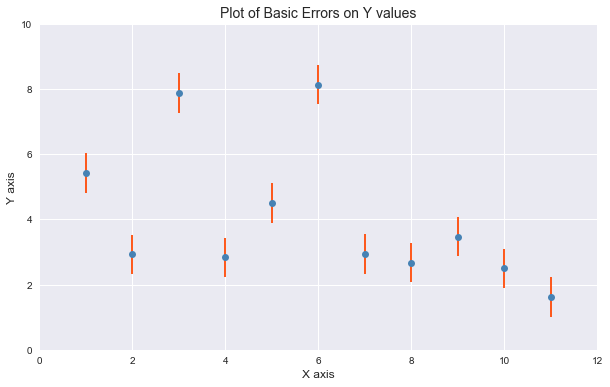

In [5]:
# For reproducibility of the data
np.random.seed(5)

# Creating the data
X = np.arange(1, 12)
Y = np.cos(X) + 2 * np.random.randn(11) + 4

# Basic error
Y_error = 0.6

# Defining the figure and figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the error bars
ax.errorbar(X, Y, yerr=Y_error, fmt='o', ecolor='orangered',
            color='steelblue', capsize=2)

# Adding plotting parameters
ax.set_title('Plot of Basic Errors on Y values', fontsize=14)
ax.set_xlabel('X axis', fontsize=12)
ax.set_ylabel('Y axis', fontsize=12)
ax.set_xlim(0, 12)
ax.set_ylim(0, 10);

# Symmetric Error Bars examples

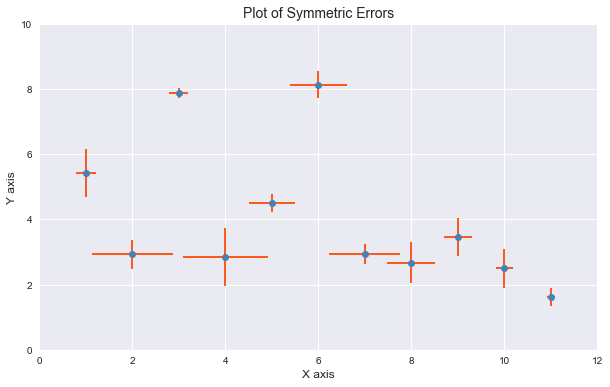

In [6]:
# For reproducibility of the data
np.random.seed(5)

# Creating error data
X_error = np.random.rand(11)
Y_error = np.random.rand(11)

# Defining the figure, and figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the error bars
ax.errorbar(X, Y, xerr=X_error, yerr=Y_error, fmt='o',
             ecolor='orangered', color='steelblue', capsize=2)

# Adding plotting parameters
ax.set_title('Plot of Symmetric Errors', fontsize=14)
ax.set_xlabel('X axis', fontsize=12)
ax.set_ylabel('Y axis', fontsize=12)
ax.set_xlim(0, 12)
ax.set_ylim(0, 10);

In [7]:
# For reproducibility of the data
np.random.seed(7)

# Importing uniform distribution
from numpy.random import uniform

# Creating trial values
X1 = np.arange(1, 12)
X2 = X1 + 0.1

# Y values corresponding to X values
Y1 = 2.5 / X1 + uniform(0.2, 0.5, len(X1))
Y2 = 3 / X1  + uniform(0.8, 1.2, len(X1))

# Errors for the plot
Y1_error = uniform(0.25, 0.6, len(X1))
Y2_error = uniform(0.25, 0.6, len(X1))

# Defining the figure and figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Parameters that are same for both lines,
# in the form of a dictionary
kwargs = dict(ecolor='k', color='k', capsize=2,
              elinewidth=1.1, linewidth=0.6, ms=7)

# Plotting two data sets with the error bars
ax.errorbar(X1, Y1, yerr=Y1_error, fmt='-o', mfc='r', **kwargs, label='Trial 1')
ax.errorbar(X2, Y2, yerr=Y2_error, fmt='-^', mfc='steelblue', **kwargs, label='Trial 2')

# Adding legend to the plot    
ax.legend(loc='best', frameon=True)

# Adding plotting parameters
ax.set_title('Plot of Two Data Sets with Symmetrical Errors', fontsize=14)
ax.set_xlabel('X axis', fontsize=12)
ax.set_ylabel('Y axis', fontsize=12)
ax.set_xlim(0, 12)
ax.set_ylim(0, 5);

# Asymmetric Error Bars example

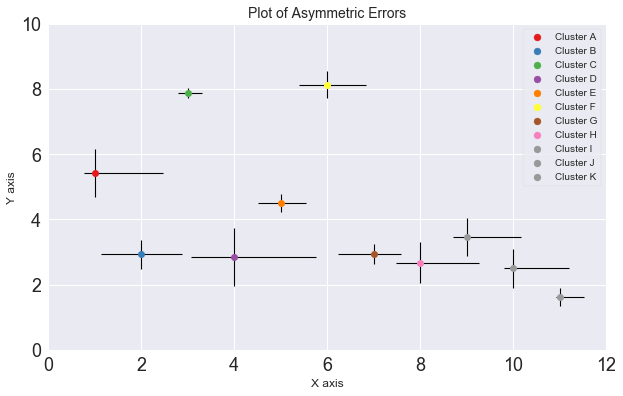

In [30]:
# For reproducibility of the data
np.random.seed(5)

# Creating lower and upper error data for X values
X_lower = np.random.rand(11)
X_upper = np.random.rand(11) * 2


# Importing colormap module
import matplotlib.cm as cm

# Creating an empty array
color_array = []

# Appending RGBA values to a new array
for i in range(20):
    color_array.append(cm.get_cmap('Set1')(i))

# Creating string with cluster letters
letters = 'ABCDEFGHIJK'

# Defining the figure and figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Looping through the letters and plotting the points
for i, letter in enumerate(letters):
    ax.errorbar(X[i], Y[i], xerr=[[X_lower[i]], [X_upper[i]]],
                yerr=Y_error[i], fmt='o', capsize=2, elinewidth=1.1,
                ms=7, ecolor='k', color=color_array[i])
    # Adding scatter plot to print the legend
    ax.scatter([], [], c=color_array[i], label='Cluster ' + letter)

# Adding legend to the plot    
ax.legend(loc='best', frameon=True)

# Adding plotting parameters
ax.set_title('Plot of Asymmetric Errors', fontsize=14)
ax.set_xlabel('X axis', fontsize=12)
ax.set_ylabel('Y axis', fontsize=12)
ax.set_xlim(0, 12)
ax.set_ylim(0, 10);

# Calculate y-error and plot

fit parameter 1-sigma error
———————————-
-0.0512146155891 +- 0.00951872028743
0.44997816825 +- 0.0676937628546
1.52370572182 +- 0.30301837292


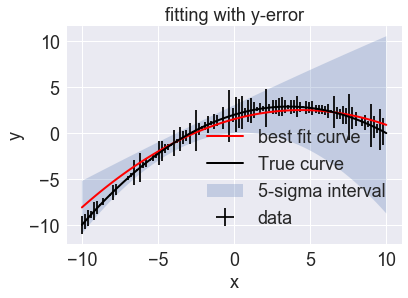

In [31]:
import numpy as np
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * x *x + b*x + c

# test data and error
x = np.linspace(-10, 10, 100)
y0 = - 0.07 * x * x + 0.5 * x + 2.
noise = np.random.normal(0.0, 1.0, len(x))
y = y0 + noise

# curve fit [with only y-error]
popt, pcov = curve_fit(func, x, y, sigma=1./(noise*noise))
perr = np.sqrt(np.diag(pcov))

# print fit parameters and 1-sigma estimates
print('fit parameter 1-sigma error')
print('———————————-')

for i in range(len(popt)):
    print(str(popt[i]) + ' +- '+ str(perr[i]))

# prepare confidence level curves
nstd = 5. # to draw 5-sigma intervals
popt_up = popt + nstd * perr
popt_dw = popt - nstd * perr

fit = func(x, *popt)
fit_up = func(x, *popt_up)
fit_dw = func(x, *popt_dw)

# plot
fig, ax = plt.subplots(1)
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['font.size']= 20
plt.errorbar(x, y0, yerr=noise, xerr=0, ecolor='k', fmt='none', label='data')

plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title('fitting with y-error', fontsize=18)
plt.plot(x, fit, 'r', lw=2, label='best fit curve')
plt.plot(x, y0, 'k-', lw=2, label='True curve')
ax.fill_between(x, fit_up, fit_dw, alpha=.25, label='5-sigma interval')
plt.legend(loc='lower right',fontsize=18)
plt.show()

# curve fit [with only y-error]
popt, pcov = curve_fit(func, x, y)